# Exploring Semantic Similarity

0. [Minimum Requirement: Basic Installation](#Installation)

Then use either:

1. [For starters: Explore Semantic Similarity With Attributions](#For-starters-Explore-Semantic-Similarity-With-Attributions)
2. [Advanced: Shape your Own Spaces](#Advanced-Shape-your-Own-Spaces)
3. [Symbolic Similarity](#symbolic-similarity)

<a name="Installation"></a>
# Installation

We start by installing the XPLAINSIM package.

This may take 1 or 2 minutes, please be patient. There may also be a dependency error due to a conflict from datasets library, this can be ignored.

In [ ]:
!pip install xplainsim

## Install Seaborn for Visualisation

In [ ]:
%pip install seaborn
import os
os.environ["WANDB_SILENT"] = "true"
os.environ["WANDB_DISABLED"] = "true"

#Attributions

<a name="For-starters-Explore-Semantic-Similarity-With-Attributions"></a>
## For starters: Explore Semantic Similarity With Attributions

Text Embedding and models like SBERT and friends are crucial for many NLP tasks.

Yet, a **fundamental problem** is that we don't know why two documents are similar or not -- the models do not natively provide any explanation for their "similarity".

Thus, this introduction part to our software enables the user to **explore how neural models construct semantic similarity of texts**.

In [3]:
# First we import from our XPLAINSIM package
from xplain.attribution import ModelFactory
from xplain.attribution import plot_attributions

# Let's also show the available confirmed supported embedding models.
print("All available models are " + str(ModelFactory.show_options()))

For using alignment to post-process attributions, please install pyemd
All available models are ['all-mpnet-base-v2', 'xlm-roberta-base', 'multilingual-e5-base', 'paraphrase-multilingual-mpnet-base', 'paraphrase-multilingual-MiniLM', 'gte-multilingual-base', 'sentence-transformers/all-mpnet-base-v2', 'FacebookAI/xlm-roberta-base', 'intfloat/multilingual-e5-base', 'sentence-transformers/paraphrase-multilingual-mpnet-base-v2', 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2', 'Alibaba-NLP/gte-multilingual-base']


### Monolingual attributions

Before or after running the next cell, **feel ree to re-run to gain neural similarity explanations for any text of your choice.**

Note that the shown attribution matrix sums up to exactly the similarity that is provided by the model, this makes this explanation very faithful to any off-the-shelf transformer model.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

100%|██████████| 768/768 [00:04<00:00, 167.21it/s]


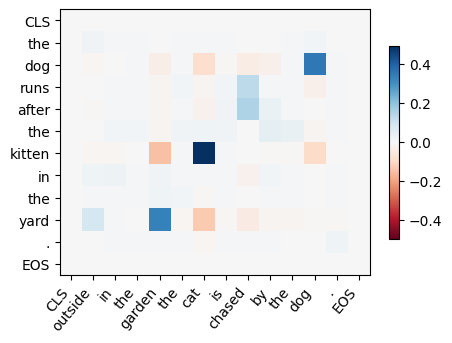

In [4]:
# Let's define two texts.
texta = "The dog runs after the kitten in the yard."
textb = "Outside in the garden the cat is chased by the dog."

# We select a popular "SBERT" model
model = ModelFactory.build("all-mpnet-base-v2")

# We generate the attributions
A, tokens_a, tokens_b = model.explain_similarity(texta, textb)

# For visualization, we plot this explanation
f = plot_attributions(
        A,
        tokens_a,
        tokens_b,
        size=(5, 5),
        # range=.3,
        show_colorbar=True,
        shrink_colorbar=0.5,
    )

### Multi-Lingual Attributions

Let's dive into **multi-lingual embedding models**. We load a multi-lingual model and compare similarity explanations from attributions when matching texts from different languages.

(Again, before or after running the next cell, feel ree to re-run to gain neural similarity explanations for any text of your choice.)


No hook has been registered.


100%|██████████| 768/768 [00:05<00:00, 148.19it/s]


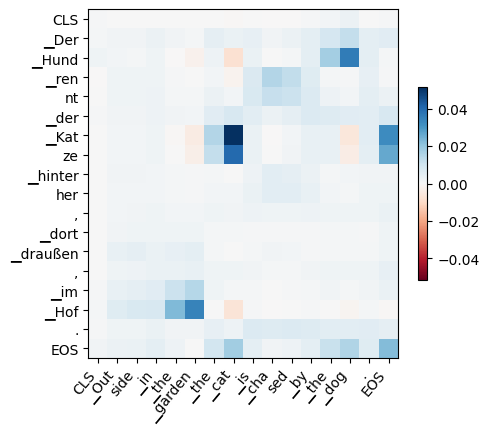

In [22]:
# Let's define two roughly parallel texts, the first one is German.
texta = "Der Hund rennt der Katze hinterher, dort draußen, im Hof."
textb = "Outside in the garden the cat is chased by the dog."

# We select a popular Multi-Lingual SOTA model
model = ModelFactory.build("sentence-transformers/paraphrase-multilingual-mpnet-base-v2")

# We generate the attributions
A, tokens_a, tokens_b = model.explain_similarity(texta, textb)

# For visualization, we plot this explanation
f = plot_attributions(
        A,
        tokens_a,
        tokens_b,
        size=(5, 5),
        # range=.3,
        show_colorbar=True,
        shrink_colorbar=0.5,
    )

### Let's Align: Executing our Post-Processing Method

Our package contributes methods for retrieving a discrete alignment from attrbution matrices.

For better understanding, we also summarize the sub-words to words.

We use the MaxAlign method from our paper. To use the slightly stronger FlowAlign method, please install `pyemd`.

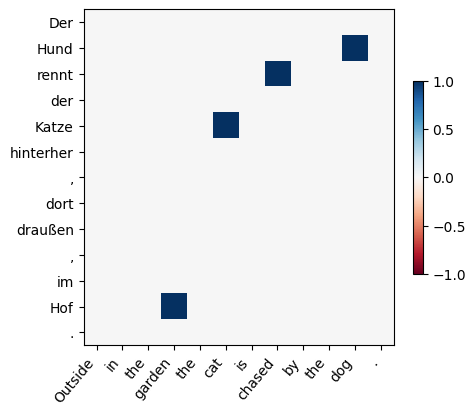

In [23]:
A_pp, tokens_a_pp, tokens_b_pp = model.postprocess_attributions(A, tokens_a, tokens_b, subtokens_aggregation_method="sum", sparsification_method="MaxAlign")
f = plot_attributions(
        A_pp,
        tokens_a_pp,
        tokens_b_pp,
        size=(5, 5),
        # range=.3,
        show_colorbar=True,
        shrink_colorbar=0.5,
    )

# Spaceshaping

<a name="Advanced-Shape-your-Own-Spaces"></a>
## Advanced: Shape your Own Spaces




Let's run a few further imports.

In [7]:
from scipy.stats import pearsonr
from xplain.spaceshaping import PartitionedSentenceTransformer
from sentence_transformers import InputExample
from datasets import load_dataset
import spacy
nlp=spacy.load("en_core_web_sm")

Let's now load some data that we can toy with

In [8]:
# let's first load a toy train dataset of sentence pairs
ds = load_dataset("mteb/stsbenchmark-sts")
some_pairs = list(zip([dic["sentence1"] for dic in ds["train"]], [dic["sentence2"] for dic in ds["train"]]))

# dev dataset of sentence pairs
some_pairs_dev = list(zip([dic["sentence1"] for dic in ds["validation"]], [dic["sentence2"] for dic in ds["validation"]]))

README.md:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

train.jsonl.gz:   0%|          | 0.00/278k [00:00<?, ?B/s]

validation.jsonl.gz:   0%|          | 0.00/86.4k [00:00<?, ?B/s]

test.jsonl.gz:   0%|          | 0.00/63.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

Let's define our custom metrics!

The model will learn to reflect these in the neural embedding space, using them to construct the overall similarity.

In [9]:
def bow_sim(x1, x2):
        x1 = set(x1.split())
        x2 = set(x2.split())
        inter = x1.intersection(x2)
        union = x1.union(x2)
        return len(inter) / len(union)

def ent_sim(doc1, doc2):
        x1_ner = " ".join([ne.text for ne in doc1.ents])
        x2_ner = " ".join([ne.text for ne in doc2.ents])
        if not x1_ner and not x2_ner:
                return 1.0
        return bow_sim(x1_ner, x2_ner)

Create training and development toy data.


In [10]:
docs1, docs2 = [nlp(x) for x, _ in some_pairs], [nlp(y) for _, y in some_pairs]
target = [[bow_sim(x1, x2), ent_sim(docs1[i], docs2[i])] for i, (x1, x2) in enumerate(some_pairs)]
some_examples = [InputExample(texts=[x1, x2], label=target[i]) for (i, (x1, x2)) in enumerate(some_pairs)]

docs1_dev, docs2_dev = [nlp(x) for x, _ in some_pairs_dev], [nlp(y) for _, y in some_pairs_dev]
target_dev = [[bow_sim(x1, x2), ent_sim(docs1_dev[i], docs2_dev[i])] for i, (x1, x2) in enumerate(some_pairs_dev)]
some_examples_dev = [InputExample(texts=[x1, x2], label=target_dev[i]) for (i, (x1, x2)) in enumerate(some_pairs_dev)]

Instantiate Model, evaluate before training, train, evaluate after training

In [13]:
# init model
pt = PartitionedSentenceTransformer(feature_names=["bow", "ent"], feature_dims=[32, 32])
json = pt.explain_similarity([x for x, y in some_pairs_dev], [y for x, y in some_pairs_dev])

# eval correlation to custom metric before training
print("Initial correlation of model with bag of words distance: {}".format(pearsonr([x.label[0] for x in some_examples_dev], [dic["bow"] for dic in json])))
print("Initial correlation of model with Entity distance: {}".format(pearsonr([x.label[1] for x in some_examples_dev], [dic["ent"] for dic in json])))

# print a toy example before training
print("Explaining a toy pair", pt.explain_similarity(["The kitten drinks milk"], ["A cat slurps something"]))

# train
pt.train(some_examples, some_examples_dev)

# eval correlation to custom metric after train
json = pt.explain_similarity([x for x, y in some_pairs_dev], [y for x, y in some_pairs_dev])
print("New correlation of model with bag of words distance: {}".format(pearsonr([x.label[0] for x in some_examples_dev], [dic["bow"] for dic in json])))
print("New correlation of model with Entity distance: {}".format(pearsonr([x.label[1] for x in some_examples_dev], [dic["ent"] for dic in json])))

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Initial correlation of model with bag of words distance: PearsonRResult(statistic=np.float64(0.5215142123849102), pvalue=np.float64(2.2015109888349015e-105))
Initial correlation of model with Entity distance: PearsonRResult(statistic=np.float64(0.11341923040504306), pvalue=np.float64(1.0663574652901735e-05))
Explaining a toy pair [{'global': np.float32(0.4101168), 'bow': np.float32(0.33066055), 'ent': np.float32(0.31407765), 'residual': np.float32(0.42901647), 'sent_a': 'The kitten drinks milk', 'sent_b': 'A cat slurps something'}]


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Computing widget examples:   0%|          | 0/2 [00:00<?, ?example/s]

Step,Training Loss,Validation Loss,Evaluator
200,No log,No log,"tensor(0.8292, device='cuda:0')"
360,No log,No log,"tensor(0.8216, device='cuda:0')"
400,No log,No log,"tensor(0.8260, device='cuda:0')"
600,0.077300,No log,"tensor(0.7994, device='cuda:0')"
720,0.077300,No log,"tensor(0.7494, device='cuda:0')"


Trainer is attempting to log a value of "0.829212486743927" of type <class 'torch.Tensor'> for key "eval/evaluator" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


tensor(6.6682, device='cuda:0') tensor(1.3588, device='cuda:0')
tensor(6.4937, device='cuda:0') tensor(1.8928, device='cuda:0')


Trainer is attempting to log a value of "0.8259521722793579" of type <class 'torch.Tensor'> for key "eval/evaluator" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


tensor(6.2188, device='cuda:0') tensor(1.9614, device='cuda:0')


Trainer is attempting to log a value of "0.7994207143783569" of type <class 'torch.Tensor'> for key "eval/evaluator" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


tensor(6.0462, device='cuda:0') tensor(3.3810, device='cuda:0')
tensor(5.9042, device='cuda:0') tensor(5.8763, device='cuda:0')
New correlation of model with bag of words distance: PearsonRResult(statistic=np.float64(0.5685390713497152), pvalue=np.float64(3.59684523217407e-129))
New correlation of model with Entity distance: PearsonRResult(statistic=np.float64(0.5786010661255128), pvalue=np.float64(8.965229821524305e-135))
Explaining a toy pair [{'global': np.float32(0.37434652), 'bow': np.float32(0.29399672), 'ent': np.float32(0.67051613), 'residual': np.float32(0.35484803), 'sent_a': 'The kitten drinks milk', 'sent_b': 'A cat slurps something'}]


In [ ]:
# print a toy example after training
print("Explaining a toy pair", pt.explain_similarity(["The kitten drinks milk"], ["A cat slurps something"]))

Let's plot the explanation of similarity for our two sentences "The kitten drinks milk" and "A cat slurps something".

<ipython-input-14-a906cba52110>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


[Text(0, 0, 'global'),
 Text(1, 0, 'bow'),
 Text(2, 0, 'ent'),
 Text(3, 0, 'residual')]

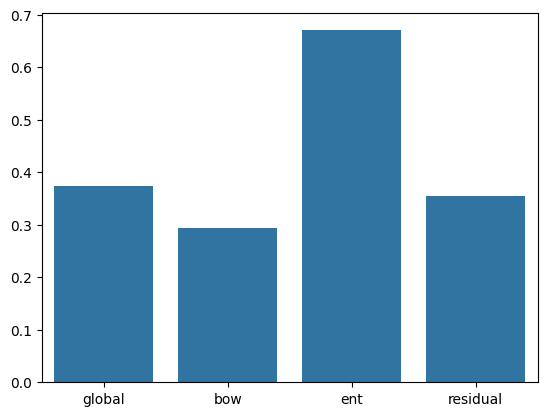

In [14]:
import seaborn as sns
ax = sns.barplot({key:value for key, value in pt.explain_similarity(["The kitten drinks milk"], ["A cat slurps something"])[0].items() if not key in ["sent_a", "sent_b"]})
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

This is it, you learnt to shape your own spaces! Improvements and some ideas for testing:

- Implement your custom similarity aspects

- Decide on different Feature Sizes

- Train on Larger Data

<a name="symbolic-similarity"></a>
# Symbolic Similarity

Let's install the AMR lib library first, and smatchpp first. The first is used as default parser, and the second as default similarity metric.

In [15]:
%pip install amrlib
%pip install unidecode
%pip install smatchpp

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.3/353.3 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 kB 3.5 MB/s eta 0:00:00
  Created wheel for smatch: filename=smatch-1.0.4-py3-none-any.whl size=24134 sha256=bef8d9357696df84932d0795df6c1cabd7f7264028f9fa6046ff08685f739a59
  Stored in directory: /root/.cache/pip/wheels/d4/5a/57/eebdbbc73db028d084a86a9b540241501d71fc2230175ce68d
Successfully built smatch
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.6/462.6 kB 38.0 MB/s eta 0:00:00
  Created wheel for smatchpp: filename=smatchpp-1.7.0-py3-

Let's run a test -- Fully symbolic similarity with Abstract Meaning Representation. A parsing model will be installed automatically.

In [16]:
from xplain.symbolic.model import AMRSimilarity

explainer = AMRSimilarity()
sents1 = ["Barack Obama holds a talk"]
sents2 = ["Hillary Clinton holds a talk"]
exp = explainer.explain_similarity(sents1, sents2, return_graphs=True)
print(exp)

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'AGENT': {'main': {'F1': np.float64(71.43), 'Precision': np.float64(71.43), 'Recall': np.float64(71.43)}, 'subgraph1': [('p', ':instance', 'person'), ('n', ':op2', 'obama'), ('p', ':name', 'n'), ('h', ':instance', 'hold-04'), ('n', ':op1', 'barack'), ('n', ':instance', 'name'), ('h', ':arg0', 'p')], 'subgraph2': [('n', ':op2', 'clinton'), ('p', ':instance', 'person'), ('n', ':op1', 'hillary'), ('p', ':name', 'n'), ('h', ':instance', 'hold-04'), ('n', ':instance', 'name'), ('h', ':arg0', 'p')]}, 'CAUSE': {'main': {'F1': np.float64(100.0), 'Precision': np.float64(100.0), 'Recall': np.float64(100.0)}, 'subgraph1': [], 'subgraph2': []}, 'CONCEPT': {'main': {'F1': np.float64(100.0), 'Precision': np.float64(100.0), 'Recall': np.float64(100.0)}, 'subgraph1': [('h', ':instance', 'hold-04'), ('t', ':instance', 'talk-01'), ('p', ':instance', 'person'), ('n', ':instance', 'name')], 'subgraph2': [('h', ':instance', 'hold-04'), ('t', ':instance', 'talk-01'), ('p', ':instance', 'person'), ('n', ':i

Let's plot this explanation. We use the red star to denote the overall similarity value.

We see that the lowest aspectual similarity is in the category "Named Entities".

<ipython-input-17-e21a73c45396>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=85)


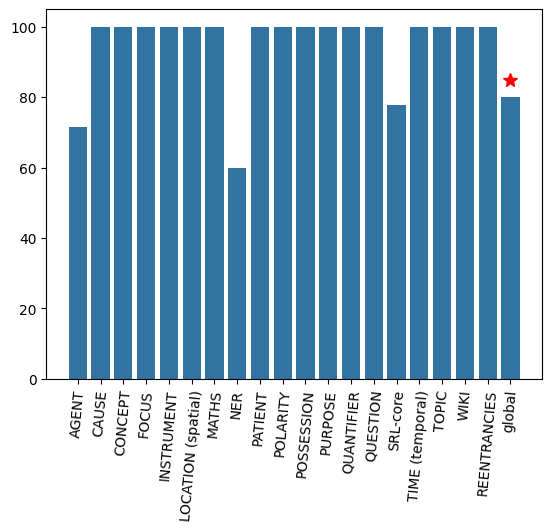

In [17]:
import seaborn as sns
ax = sns.barplot({key:exp[key]['main']['F1'] for key in exp})
ax.set_xticklabels(ax.get_xticklabels(), rotation=85)
ax.plot("global", 85, "*", markersize=10, color="r")

# That's it: What We/You Have Learned

We have learned to

*   Explain Similarity Predictions for any input text and an arbitrary off-the-shelf SOTA embedding model
  * For Monolingual and Cross-Lingual Models
*   Shape custom embedding spaces according to your aspectual measurements of interest
  * Training and Testing a Space Partitioning Model
*   Generate aspectual similarity measurements
  * in a symbolic way through the texts' Abstract Meaning Representations

